# Finite Volume Lab

Name: Kameron Lightheart

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from math import floor

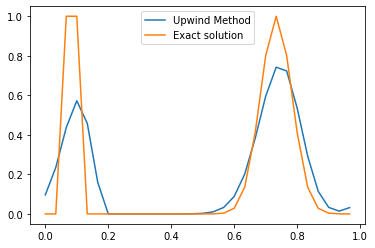

In [13]:
def upwind(u0, a, xmin, xmax, t_final, nt):
    """ Solve the advection equation with periodic
    boundary conditions on the interval [xmin, xmax
    using the upwind finite volume scheme.
    Use u0 as the initial conditions.
    a is the constant from the PDE.
    Use the size of u0 as the number of nodes in
    the spatial dimension.
    Let nt be the number of spaces in the time dimension
    (this is the same as the number of steps if you do
    not include the initial state).
    Plot and show the computed solution along
    with the exact solution. """

    dt = float(t_final) / nt
    
    # Since we are doing periodic boundary conditions,
    # we need to divide by u0.size instead of (u0.size - 1).
    dx = float(xmax - xmin) / u0.size
    
    lambda_ = a * dt / dx
    u = u0.copy()
    
    for j in range(nt):
        # The Upwind method. The np.roll function helps us
        # account for the periodic boundary conditions.
        u -= lambda_ * (u - np.roll(u, 1))
        
    # Get the x values for the plots.
    x = np.linspace(xmin, xmax, u0.size+1)[:-1]
    
    # Plot the computed solution.
    plt.plot(x, u, label='Upwind Method')
    
    # Find the exact solution and plot it.
    distance = a * t_final
    roll = int((distance - floor(distance)) * u0.size)
    plt.plot(x, np.roll(u0, roll), label='Exact solution')
    
    # Show the plot with the legend.
    plt.legend(loc='best')
    
# Define the initial conditions.
# Leave off the last point since we're using periodic
# boundary conditions.
nx = 30
nt = nx * 3 // 2
x = np.linspace(0., 1., nx+1)[:-1]
u0 = np.exp(-(x - .3)**2 / .005)
arr = (.6 < x) & (x < .7 )
u0[arr] += 1.

# Run the simulation.
upwind(u0, 1.2, 0, 1, 1.2, nt)

# Problem 1

Implement the Lax Wendroff method and use it to solve (9.7). For N = 30, 60, 120, 240,
plot the analytic solution, the upwind solution, and the Lax-Wendroff solution. (You should
have 4 separate plots, each with 3 graphs.) You should be able to tell that the Lax Wendroff
method approximates the smooth portion of the signal much better, as it does not struggle with
diffusion. Unfortunately, it has some diffculty with the discontinuous portion, where unphysical oscillations are seen. Recall that we saw something similar in the waves lab when there
were discontinuous initial conditions.
Hint: Use equations 9.9 and 9.3.

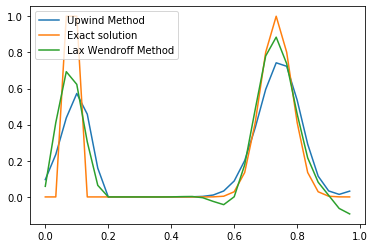

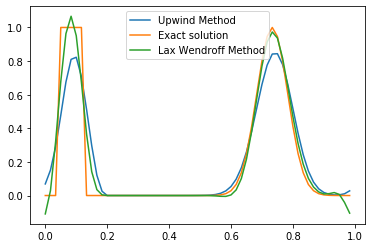

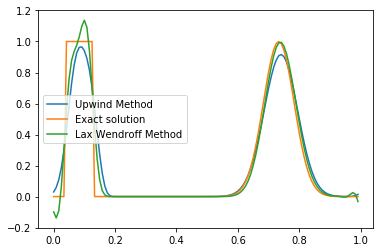

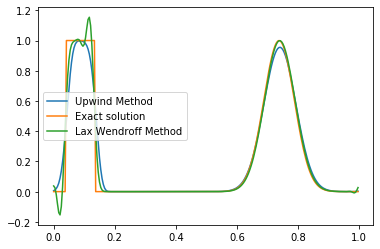

In [32]:
def lax_wendroff(u0, a, xmin, xmax, t_final, nt):
    """ Solve the advection equation with periodic
    boundary conditions on the interval [xmin, xmax
    using the lax wendroff finite volume scheme.
    Use u0 as the initial conditions.
    a is the constant from the PDE.
    Use the size of u0 as the number of nodes in
    the spatial dimension.
    Let nt be the number of spaces in the time dimension
    (this is the same as the number of steps if you do
    not include the initial state).
    Plot and show the computed solution along
    with the exact solution. """
        
    dt = float(t_final) / nt
    
    # Since we are doing periodic boundary conditions,
    # we need to divide by u0.size instead of (u0.size - 1).
    dx = float(xmax - xmin) / u0.size
    
    lambda_ = a * dt / dx
    u = u0.copy()
    
    for j in range(nt):
        
        m = (np.roll(u, -1) - u) / dx
        diff = dx - a * dt
        
        u -= lambda_ * (u + m/2 * diff - np.roll(u, 1) - np.roll(m, 1)/2 * diff)
        
    # Get the x values for the plots.
    x = np.linspace(xmin, xmax, u0.size+1)[:-1]
    
    # Plot the computed solution.
    plt.plot(x, u, label='Lax Wendroff Method')
    
    # Show the plot with the legend.
    plt.legend(loc='best')
    
    
# For N = 30, 60, 120, 240, 
Ns = [30, 60, 120, 240]
for N in Ns:
    nt = N * 3 // 2
    x = np.linspace(0., 1., N+1)[:-1]
    u0 = np.exp(-(x - .3)**2 / .005)
    arr = (.6 < x) & (x < .7 )
    u0[arr] += 1.
    
    # plot the analytic solution, 
    # the upwind solution, 
    upwind(u0, 1.2, 0, 1, 1.2, nt)

    # the Lax-Wendroff solution.
    lax_wendroff(u0, 1.2, 0, 1, 1.2, nt)
    
    plt.show()

# Problem 2

Implement the Minmod method and use it to solve (9.7). For N = 30, 60, 120, 240,
plot the anaytic solution, the upwind solution, the Lax-Wendroff solution, and the Minmod
solution. (You should have 4 separate plots, each with 4 graphs.) Be sure to vectorize the
minmod operation.
Hint: Use equations 9.9 and 9.3.

In [28]:
def min_mod(a, b):
    if a*b < 0:
        return 0
    elif np.abs(a) < np.abs(b):
        return a
    else:
        return b
min_mod = np.vectorize(min_mod)

In [22]:
a = np.array([1, 2, 0])
b = np.array([4, 5, 6])
min_mod(a, b)

array([1, 2, 0])

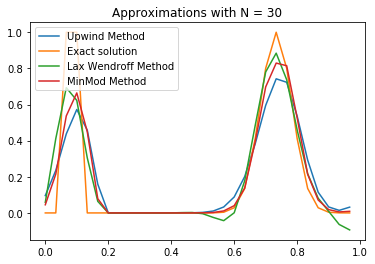

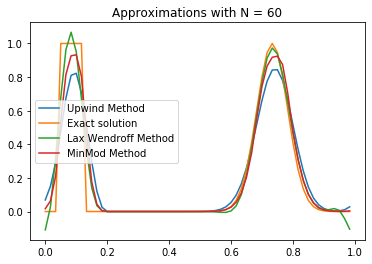

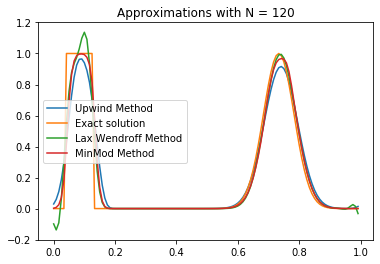

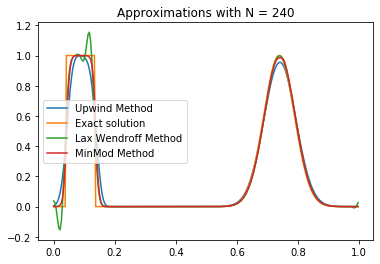

In [33]:
def minmod_method(u0, a, xmin, xmax, t_final, nt):
    """ Solve the advection equation with periodic
    boundary conditions on the interval [xmin, xmax
    using the minmod finite volume scheme.
    Use u0 as the initial conditions.
    a is the constant from the PDE.
    Use the size of u0 as the number of nodes in
    the spatial dimension.
    Let nt be the number of spaces in the time dimension
    (this is the same as the number of steps if you do
    not include the initial state).
    Plot and show the computed solution along
    with the exact solution. """
    
    dt = float(t_final) / nt
    
    # Since we are doing periodic boundary conditions,
    # we need to divide by u0.size instead of (u0.size - 1).
    dx = float(xmax - xmin) / u0.size
    
    lambda_ = a * dt / dx
    u = u0.copy()
    
    for j in range(nt):
        
        m = min_mod((u - np.roll(u, 1)) / dx, (np.roll(u, -1) - u) / dx) 
        diff = dx - a * dt
        
        u -= lambda_ * (u + m/2 * diff - np.roll(u, 1) - np.roll(m, 1)/2 * diff)
        
    # Get the x values for the plots.
    x = np.linspace(xmin, xmax, u0.size+1)[:-1]
    
    # Plot the computed solution.
    plt.plot(x, u, label='MinMod Method')
    
    # Show the plot with the legend.
    plt.legend(loc='best')

# For N = 30, 60, 120, 240, 
Ns = [30, 60, 120, 240]
for N in Ns:
    nt = N * 3 // 2
    x = np.linspace(0., 1., N+1)[:-1]
    u0 = np.exp(-(x - .3)**2 / .005)
    arr = (.6 < x) & (x < .7 )
    u0[arr] += 1.
    
    # plot the analytic solution, 
    # the upwind solution, 
    upwind(u0, 1.2, 0, 1, 1.2, nt)

    # the Lax-Wendroff solution.
    lax_wendroff(u0, 1.2, 0, 1, 1.2, nt)
    
    # and the Minmod solution.
    minmod_method(u0, 1.2, 0, 1, 1.2, nt)
    
    plt.title(f"Approximations with N = {N}")
    
    plt.show()